In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [2]:
df = pd.read_csv('../Data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
print('Dimensions: ', df.shape)

print("\nColumns Names: ", df.columns)

print("\n Info:")
df.info()

Dimensions:  (1000, 8)

Columns Names:  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
print("Null Values: ", df.isnull().sum())

Null Values:  gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [5]:
print("Duplicated Data: ", df.duplicated().sum())

Duplicated Data:  0


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [8]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [9]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [10]:
df['Average Score'] = np.round(df[['math score', 'reading score', 'writing score']].mean(axis=1),2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


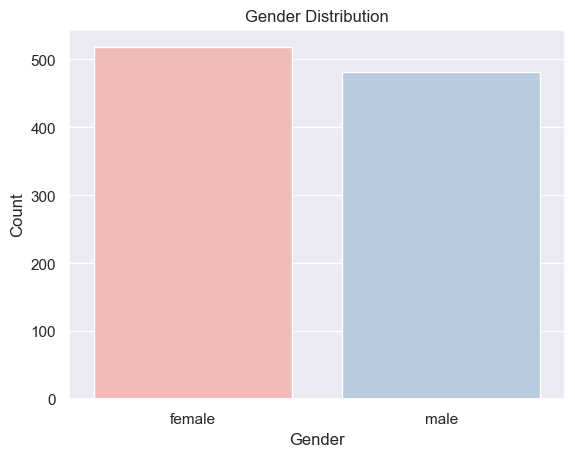

In [11]:
sns.countplot(x='gender',data=df,hue='gender',palette='Pastel1')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('../Output/Charts/Gendist.png')
plt.show()

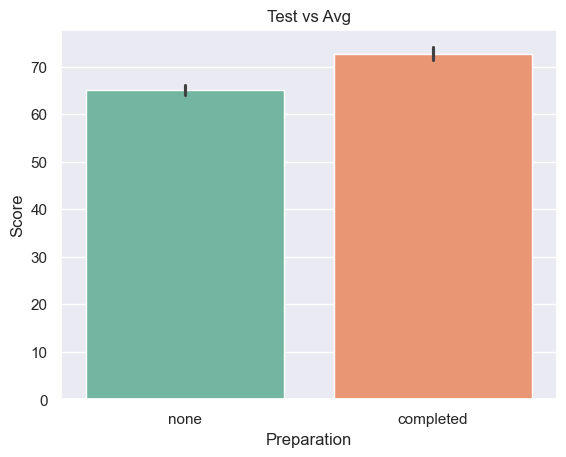

In [12]:
sns.barplot(x='test preparation course', y='Average Score', hue='test preparation course', data=df, palette='Set2')
plt.title('Test vs Avg')
plt.xlabel('Preparation')
plt.ylabel('Score')
plt.savefig('../Output/Charts/TestvsAvg.png')
plt.show()

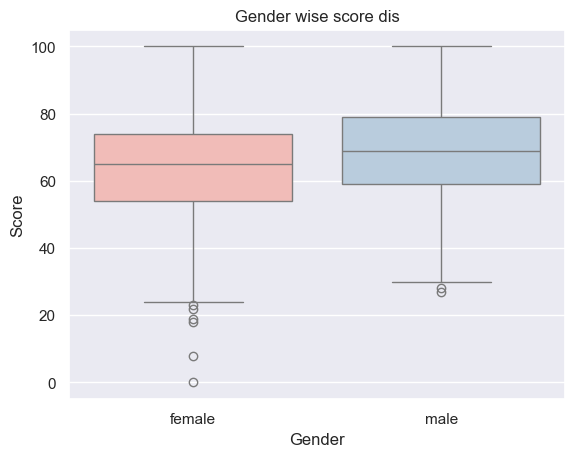

In [13]:
sns.boxplot(x='gender', data=df, y='math score', hue='gender', palette='Pastel1')
plt.title('Gender wise score dis')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.savefig('../Output/Charts/genmath.png')
plt.show()

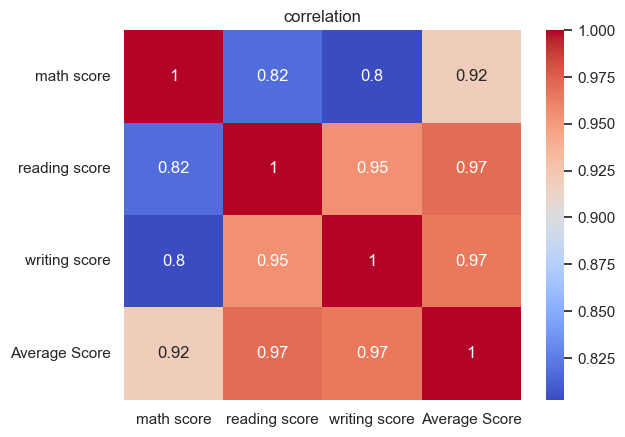

In [14]:
sns.heatmap(df[['math score','reading score','writing score','Average Score']].corr(),annot=True,cmap='coolwarm')
plt.title('correlation')
plt.savefig('../Output/Charts/corr.png')
plt.show()

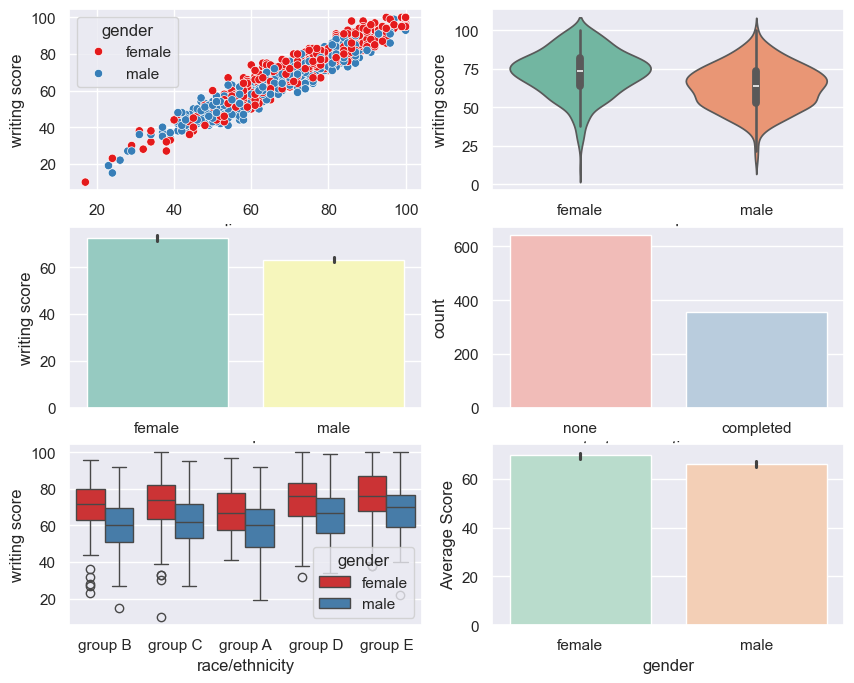

In [15]:
fig, axes = plt.subplots(3,2,figsize=(10,8))

sns.scatterplot(x='reading score', y='writing score', hue='gender', data=df, ax=axes[0,0],palette='Set1')

sns.violinplot(x='gender', y='writing score', hue='gender', data=df, ax=axes[0,1],palette='Set2')

sns.barplot(x='gender', y='writing score', hue='gender', data=df, ax=axes[1,0],palette='Set3')

sns.countplot(x='test preparation course', hue='test preparation course', data=df, ax=axes[1,1],palette='Pastel1')

sns.boxplot(x='race/ethnicity', y='writing score', hue='gender', data=df, ax=axes[2,0],palette='Set1')

sns.barplot(x='gender', y='Average Score', hue='gender', data=df, ax=axes[2,1],palette='Pastel2')

plt.savefig('../Output/Charts/sub.png')

plt.show()

In [ ]:
dashboard_md = """

# student performance analysis


## 1. Gender Distribution

!['Gender_dist'](../Charts/Gendist.png)

--Graph: Bar plot of gender count.

--Insight: Female students slightly outnumber male students.


## 2. Test Score vs Average

!['TestvsAvg'](../Charts/TestvsAvg.png)

--Graph: Bar chart of average scores by test preparation status.

--Insight:

Students who completed test prep scored significantly higher than those who didn’t.


## 3. Gender wise score distribution

!['genmath'](../Charts/genmath.png)

--Graph: Box plot of scores by gender.

--Insight:

Male students have a slightly higher median score.

Female students show more outliers on the lower end.

Male students exhibit a broader spread, indicating more variability.


## 4. Correlation

!['corr'](../Charts/corr.png)

-- Correlation chart

--Insight:

Strong correlation between reading, writing, and average score (0.95+).

Math score is also highly correlated but slightly less so than reading/writing pair.


## 5. Subplots 

!['sub'](../Charts/sub.png)

--Insight:

 subplots contatining scatter,voilin,bar,count,box plots

 Reading and writing scores are strongly related, and gender and test prepration slightly influene overall performance

"""

with open('../Output/Insights/insight.md','w',encoding='utf-8') as f:
    f.write(dashboard_md)

print('File saved succesfully')

File saved succesfully
